# <font color = 'red'> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

# <font color = 'Red'> Importing Data

In [2]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


###### Descriptive Stats

In [3]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# <font color = 'red'> Perform EDA

###### Checking Datatype

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


###### Checking NULL and Duplicate Values

In [5]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [6]:
data[data.duplicated()]

,Delivery Time,Sorting Time


###### Checking Collinearity

In [7]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


###### 
+ As we can see the Collinearity between the predictor and response variable is > 0.8 which is quite good

# <font color = 'red'> Graphical Representation of the Data

<Figure size 10000x10000 with 0 Axes>

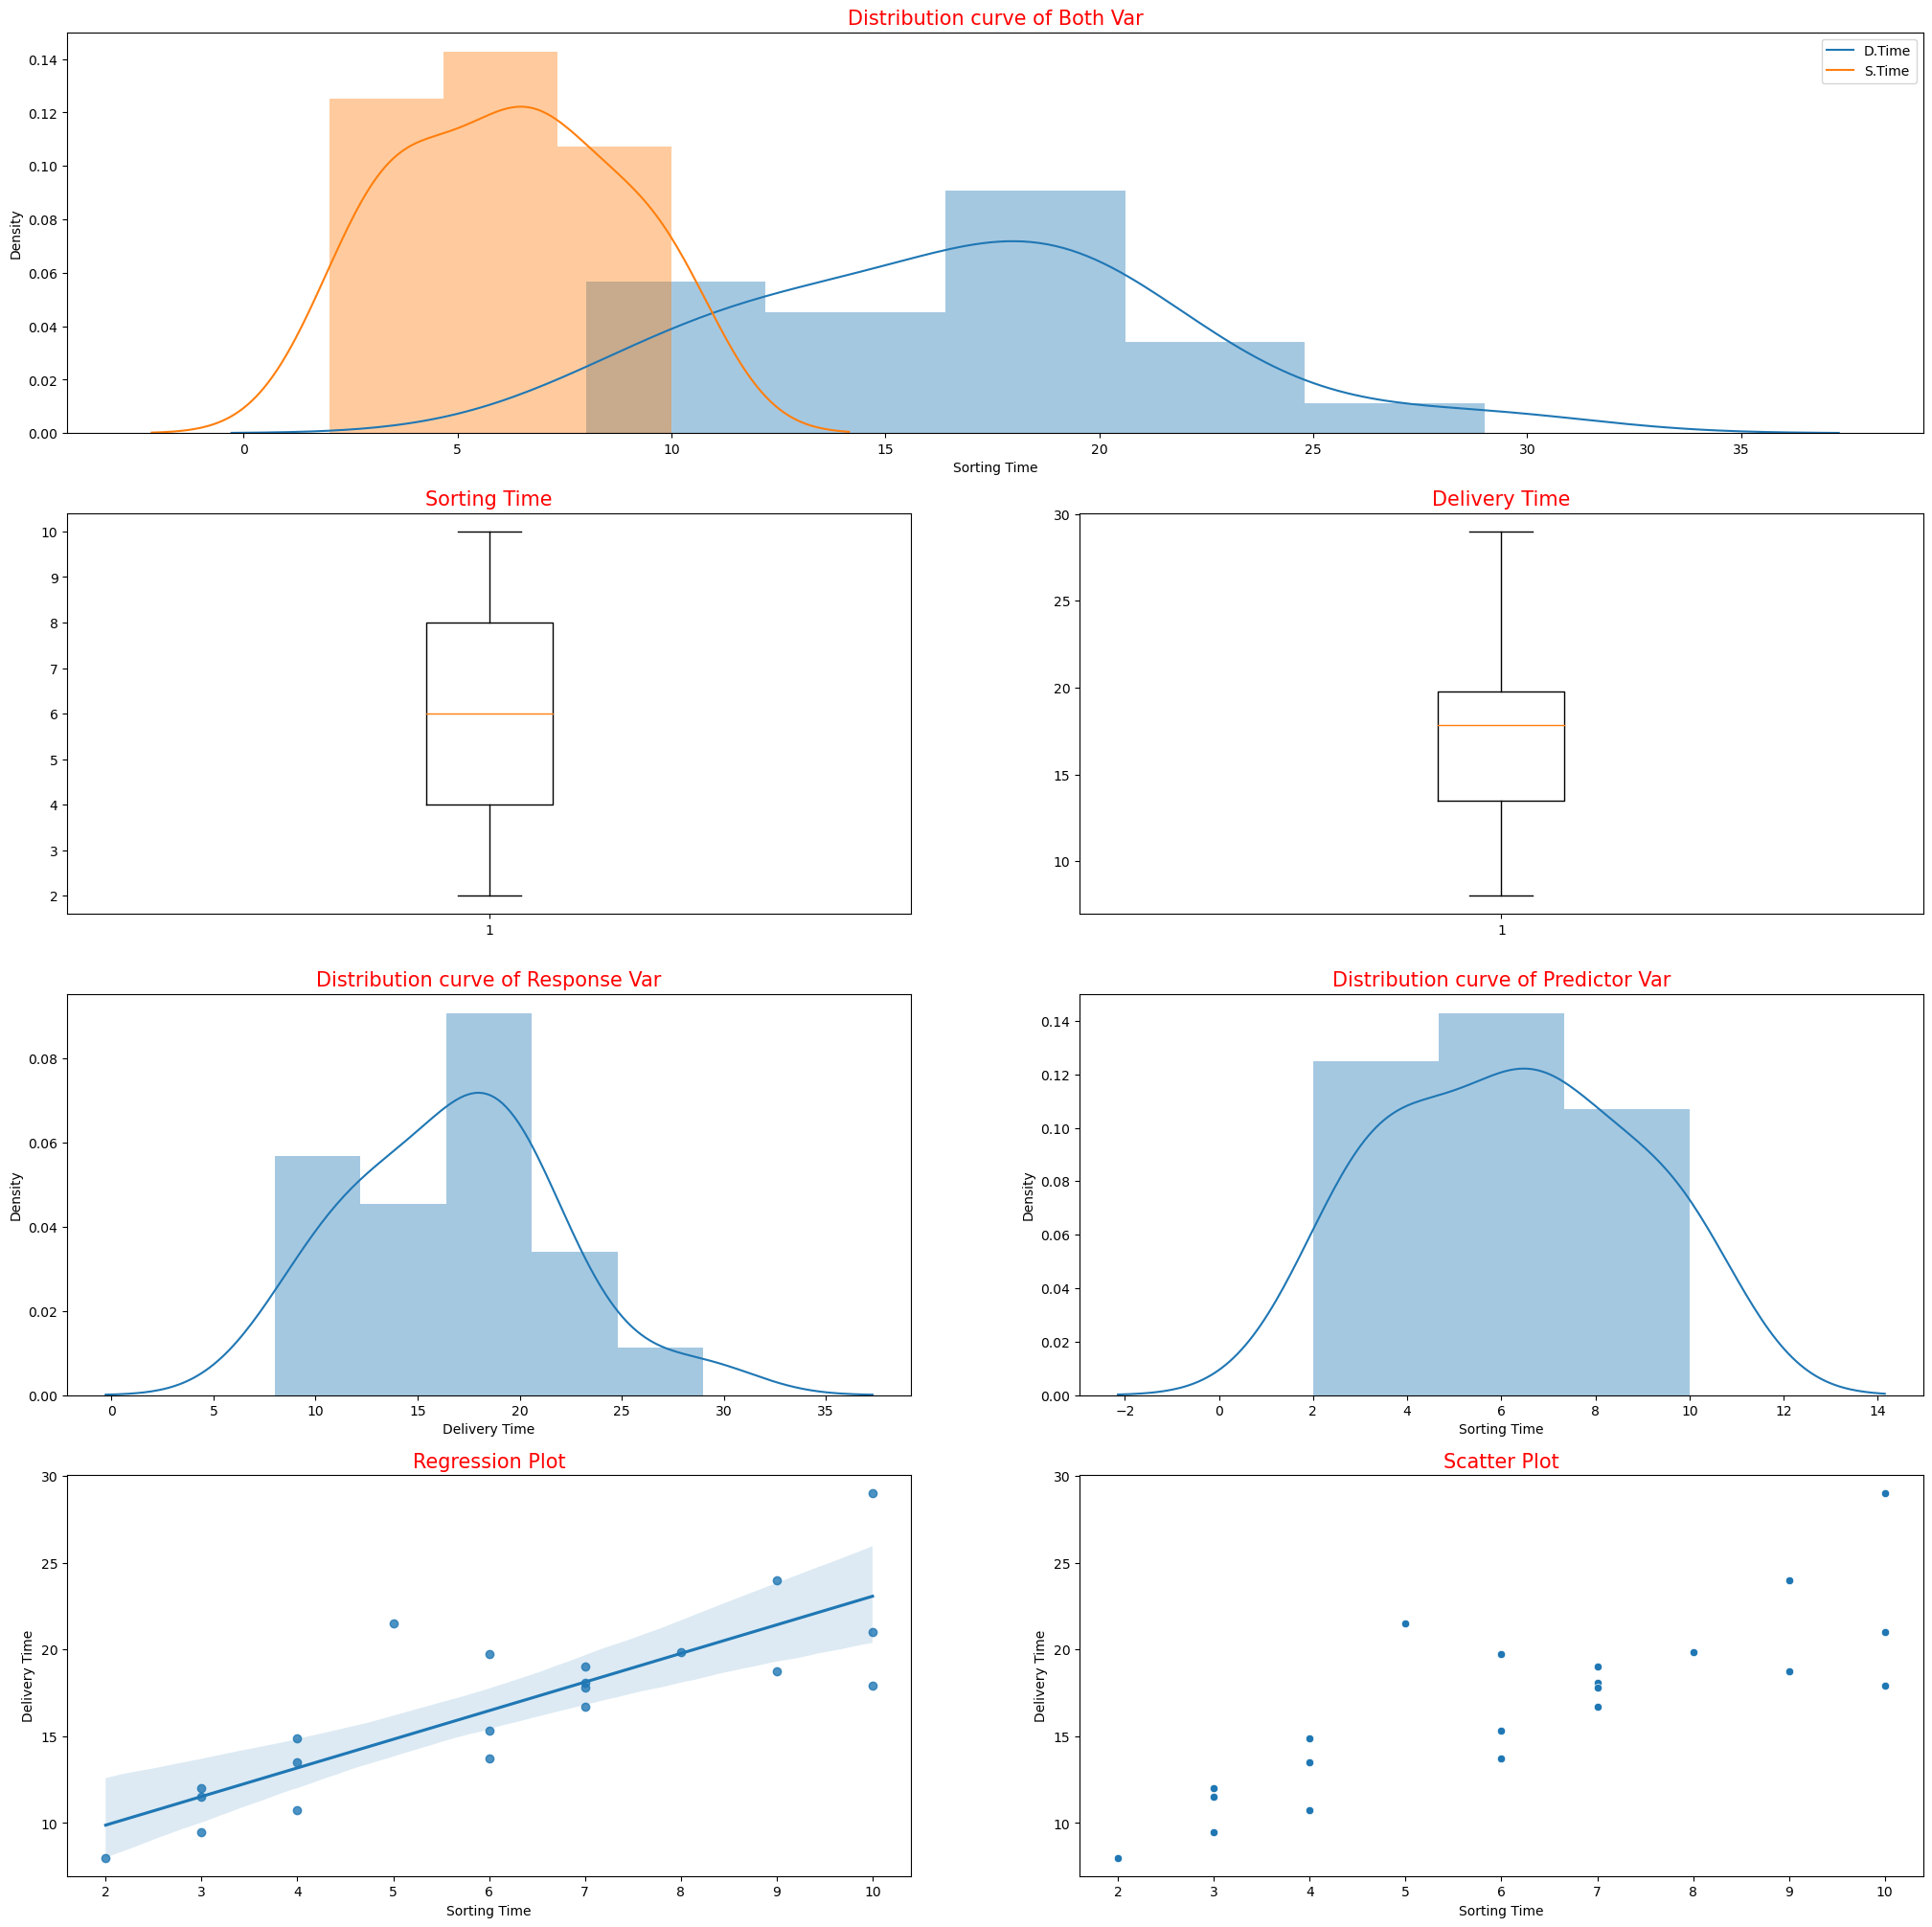

In [8]:
plt.figure(figsize=[100,100])
plt.subplots(4, 2, figsize=(25,25))
plt.subplot(423)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time',fontdict={'fontsize':15,'color': 'red'})
plt.subplot(424)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time',fontdict={'fontsize':15,'color': 'red'})
plt.subplot(425)
sns.distplot(data['Delivery Time'],kde=True)
plt.title('Distribution curve of Response Var',fontdict={'fontsize':15,'color': 'red'})
plt.subplot(426)
sns.distplot(data['Sorting Time'],kde=True)
plt.title('Distribution curve of Predictor Var',fontdict={'fontsize':15,'color': 'red'})
plt.subplot(427)
sns.regplot(x= data['Sorting Time'], y= data['Delivery Time'])
plt.title('Regression Plot',fontdict={'fontsize':15,'color': 'red'})
plt.subplot(428)
sns.scatterplot(x= data['Sorting Time'], y= data['Delivery Time'])
plt.title('Scatter Plot',fontdict={'fontsize':15,'color': 'red'})
plt.subplot(411)
labels = ['D.Time', 'S.Time']
sns.distplot(data['Delivery Time'],kde=True)
sns.distplot(data['Sorting Time'],kde=True)
plt.legend(labels)
plt.title('Distribution curve of Both Var',fontdict={'fontsize':15,'color': 'red'})

plt.show()

###### Checking Normality of the Variables

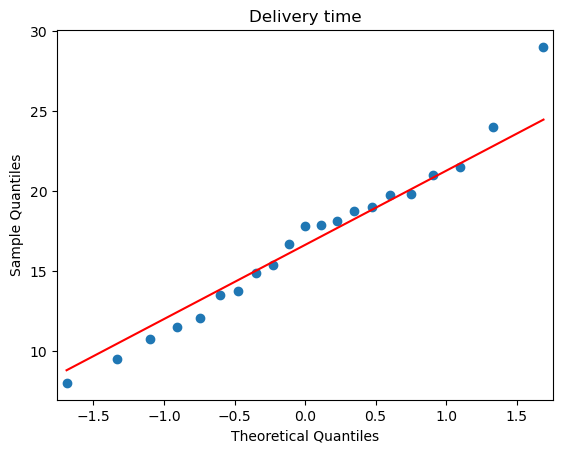

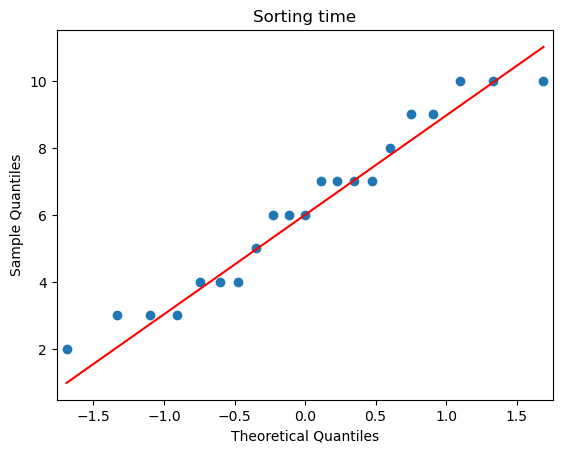

In [9]:
sm.qqplot(data['Delivery Time'], line ='q')
plt.title('Delivery time')
sm.qqplot(data['Sorting Time'], line ='q')
plt.title('Sorting time')
plt.show()

###### 
+ We can see both the Variables does not have very good normality in their Distribution Curves espicially the Independent Variable

# <font color = 'red'> Building Model

In [10]:
model = smf.ols("data['Delivery Time']~data['Sorting Time']", data = data).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data['Delivery Time']   R-squared:                       0.682
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     40.80
Date:                   Sat, 11 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                           20:03:16   Log-Likelihood:                -51.357
No. Observations:                     21   AIC:                             106.7
Df Residuals:                         19   BIC:                             108.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5827      1.722      3.823      0.001       2.979      10.186
data['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### 
+ We can see the r-squared value is 0.682.
+ It is a thumb rule that the r-squared value should be >0.85 for the model to be considered as a good model
+ So to overcome this we perform Data Transformation on Variables

# <font color = 'red'> DATA TRANSFORMATION AND VISUALIZATION

## <font color = 'green'> LOG Transformation

<Figure size 10000x10000 with 0 Axes>

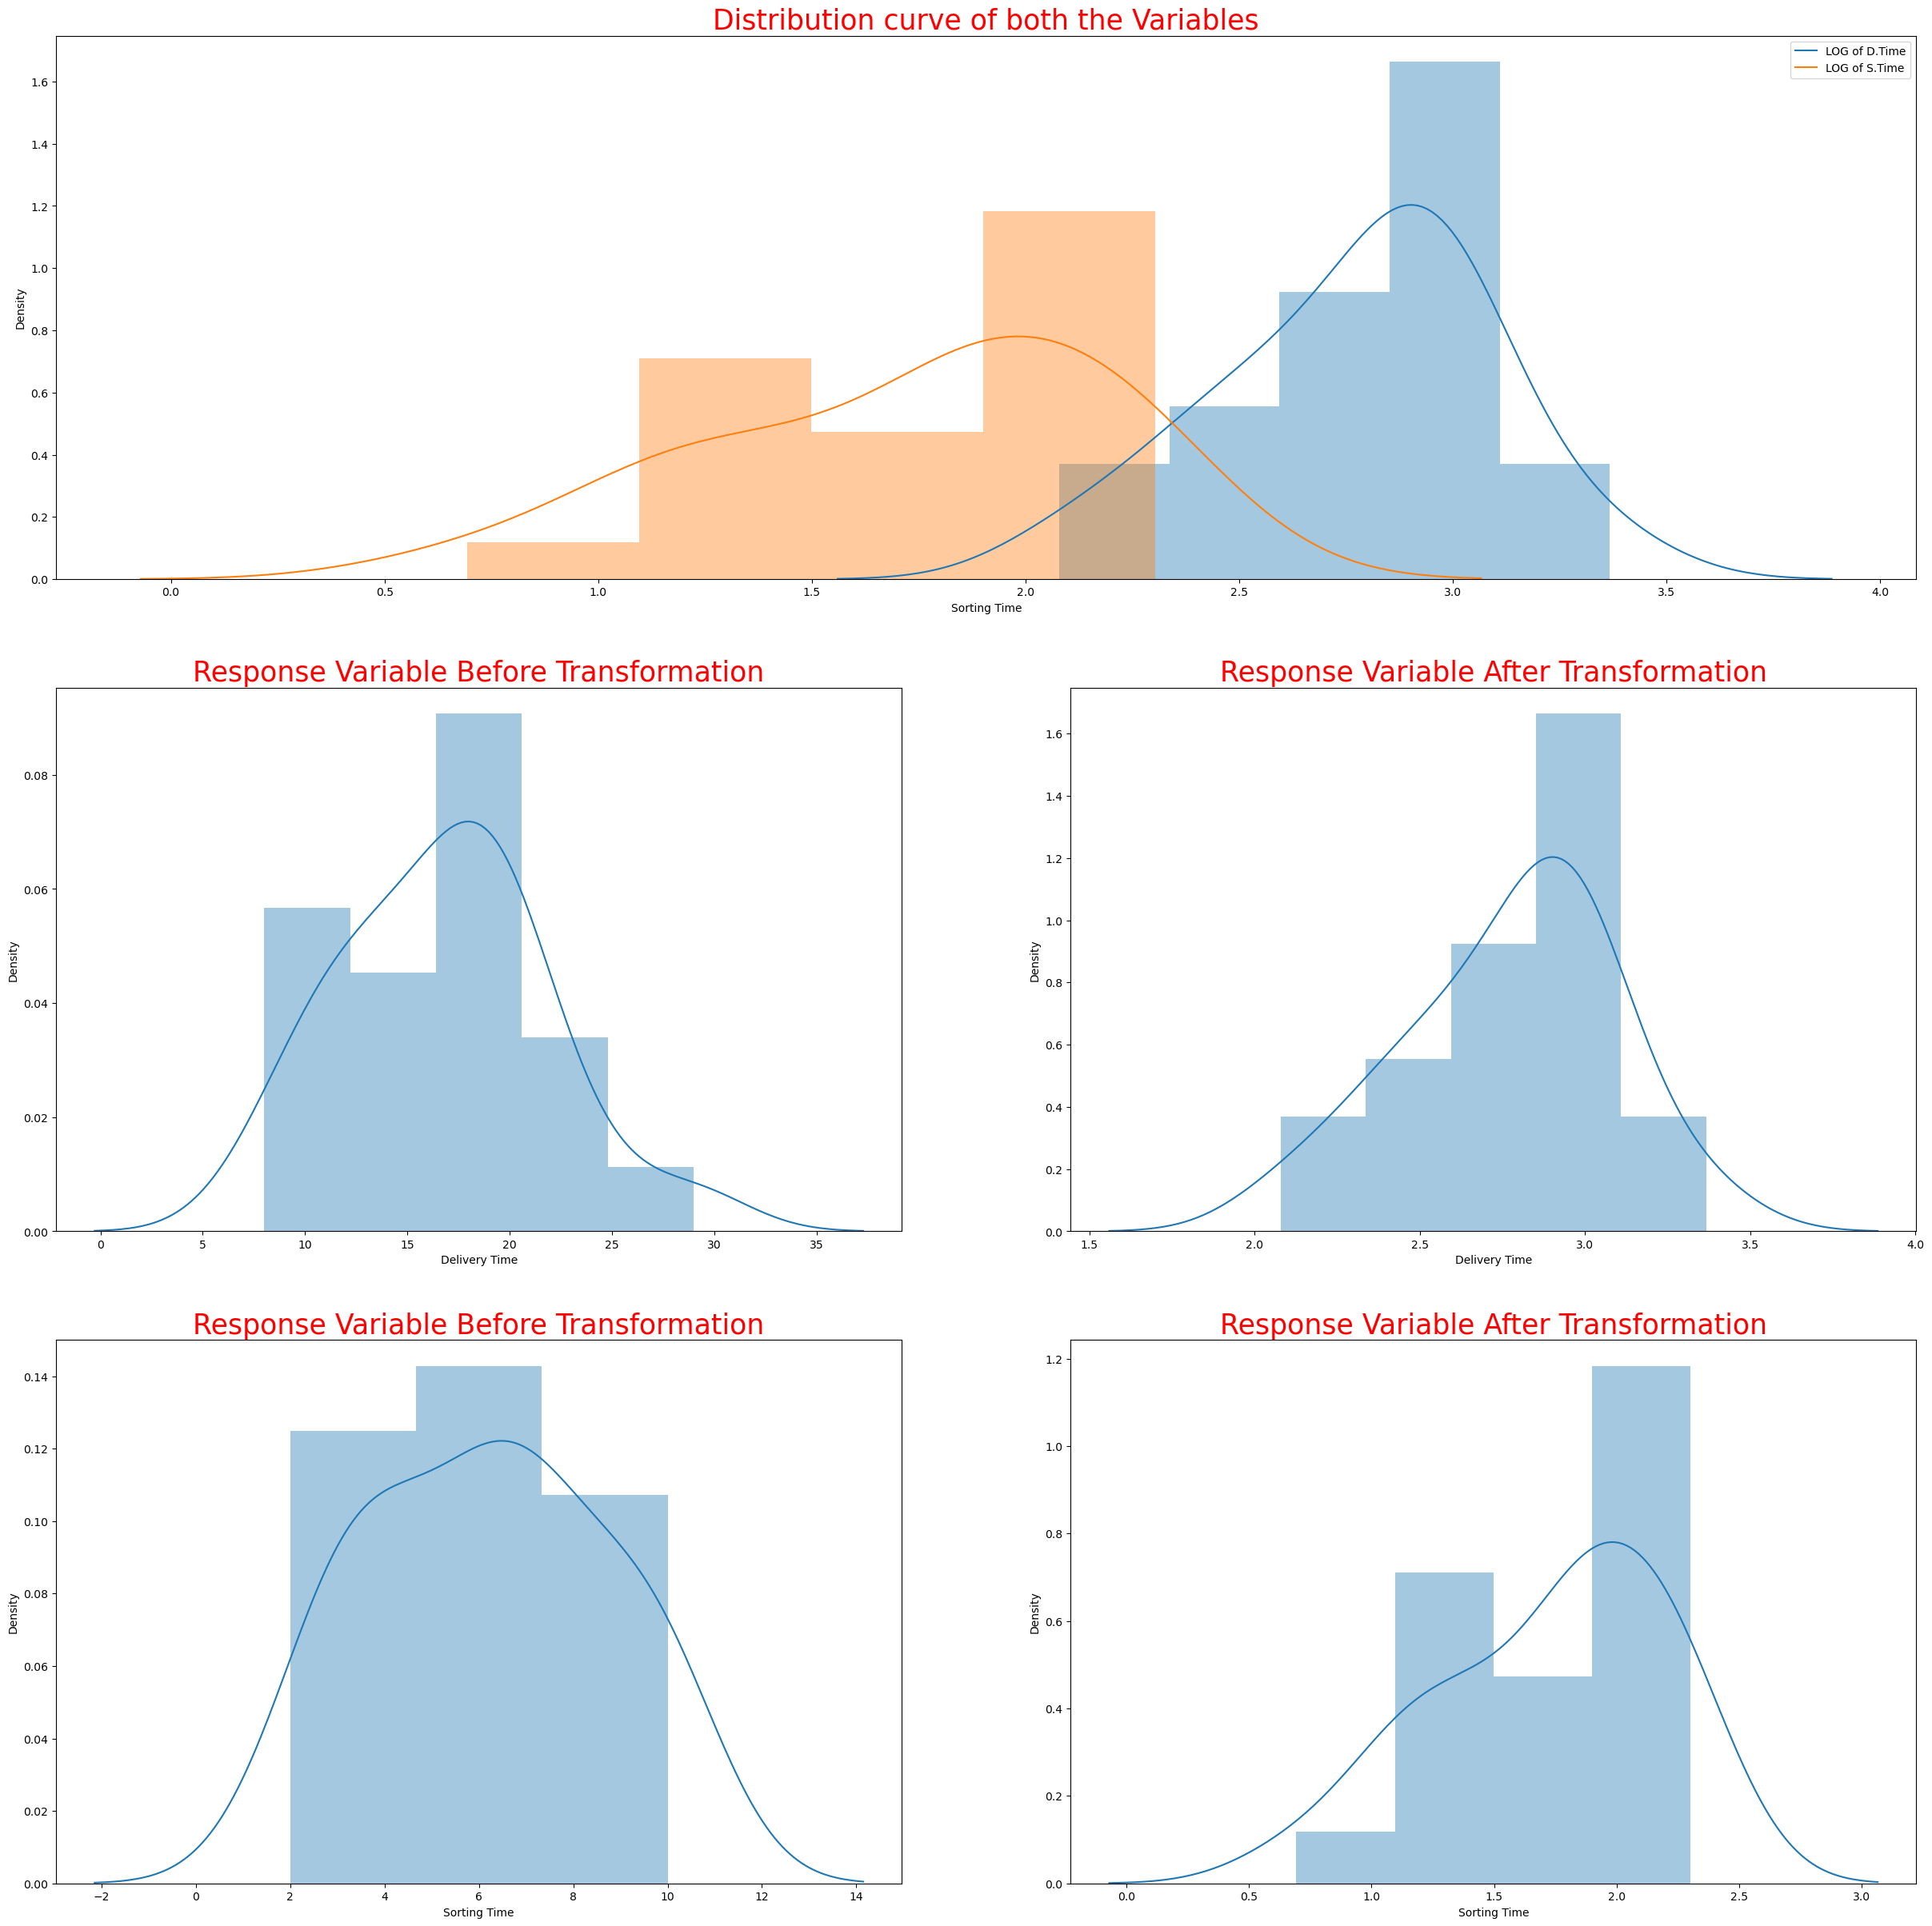

In [12]:
plt.figure(figsize=[100,100])
plt.subplots(3,2, figsize=(30,30))
plt.subplot(311)
labels=['LOG of D.Time','LOG of S.Time']
sns.distplot(np.log(data['Delivery Time']), kde=True)
sns.distplot(np.log(data['Sorting Time']), kde=True)
plt.legend(labels)
plt.title('Distribution curve of both the Variables', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(323)
sns.distplot(data['Delivery Time'], kde= True)
plt.title('Response Variable Before Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(324)
sns.distplot(np.log(data['Delivery Time']), kde= True)
plt.title('Response Variable After Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(325)
sns.distplot(data['Sorting Time'], kde= True)
plt.title('Response Variable Before Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(326)
sns.distplot(np.log(data['Sorting Time']), kde= True)
plt.title('Response Variable After Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.show()

#### <font color = 'green'> Building Model on LOG Transformed Data

In [13]:
model1 = smf.ols("np.log(data['Delivery Time'])~np.log(data['Sorting Time'])", data = data).fit()

In [14]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(data['Delivery Time'])   R-squared:                       0.772
Model:                                       OLS   Adj. R-squared:                  0.760
Method:                            Least Squares   F-statistic:                     64.39
Date:                           Sat, 11 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                                   20:03:18   Log-Likelihood:                 10.291
No. Observations:                             21   AIC:                            -16.58
Df Residuals:                                 19   BIC:                            -14.49
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.7420      0.133     13.086      0.000       1.463       2.021
np.log(data['Sorting Time'])     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = 'green'> SQUARE ROOT Transformation

<Figure size 10000x10000 with 0 Axes>

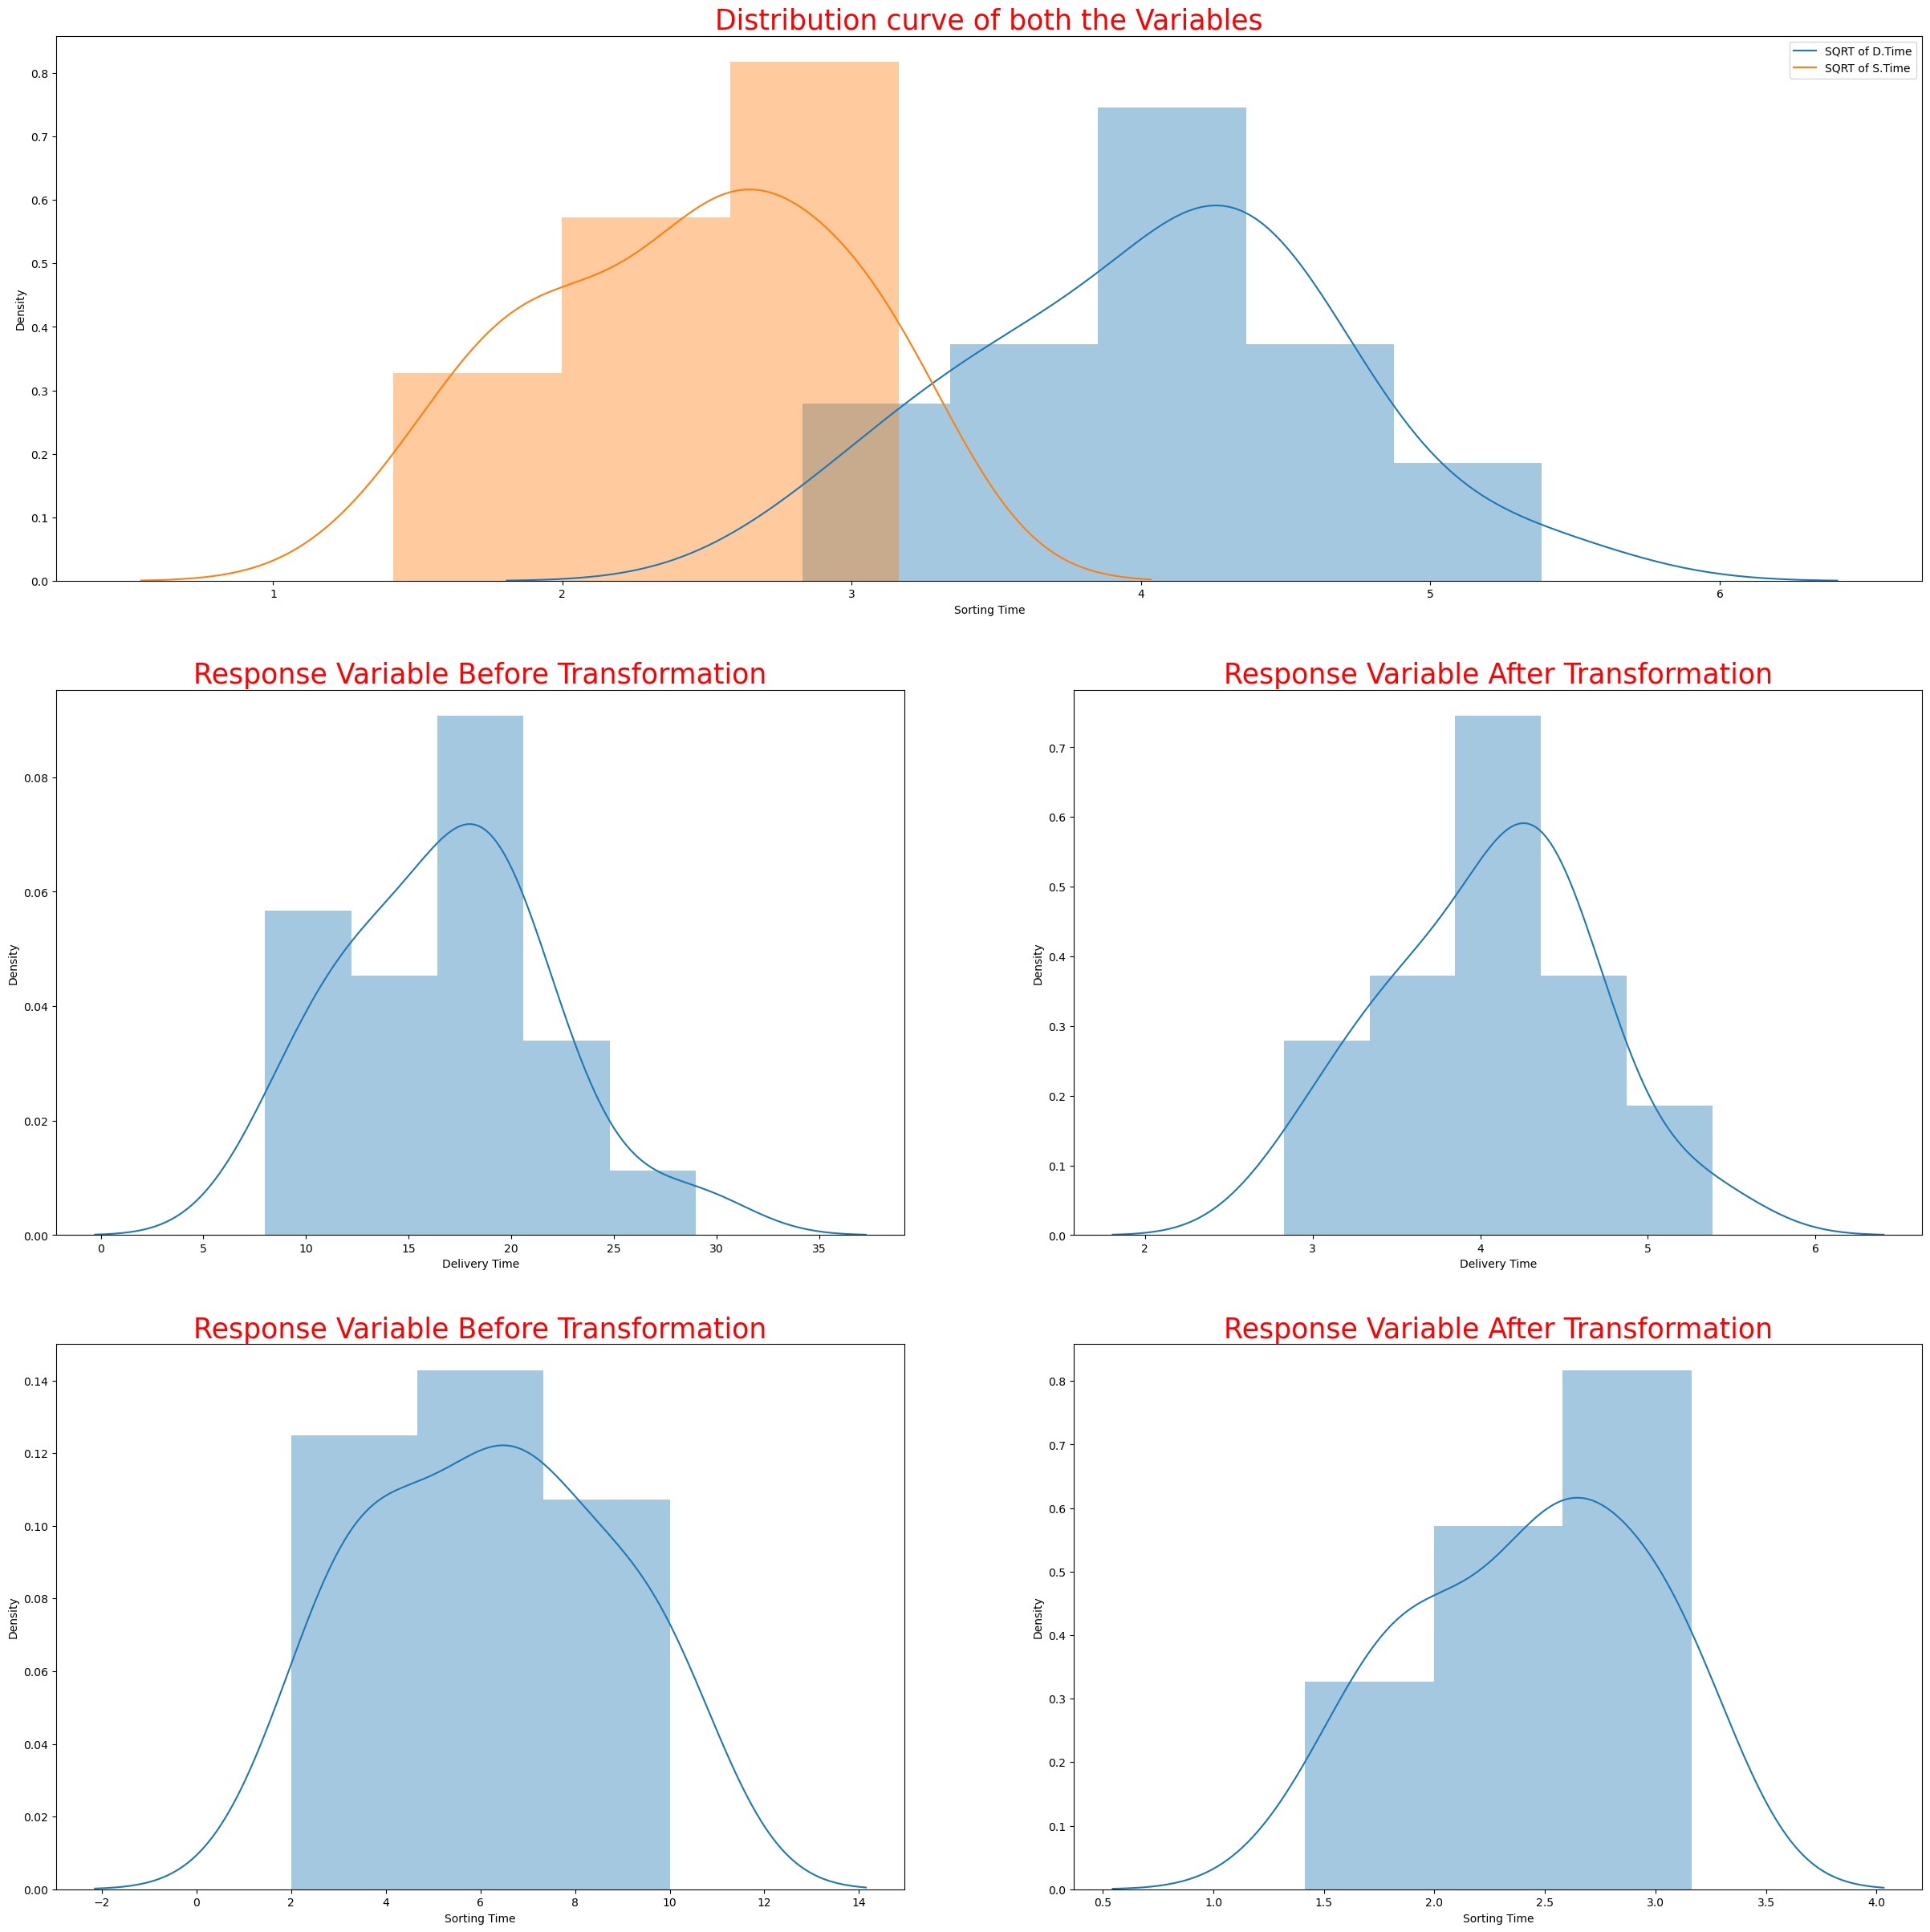

In [15]:
plt.figure(figsize=[100,100])
plt.subplots(3,2, figsize=(30,30))
plt.subplot(311)
labels=['SQRT of D.Time','SQRT of S.Time']
sns.distplot(np.sqrt(data['Delivery Time']), kde=True)
sns.distplot(np.sqrt(data['Sorting Time']), kde=True)
plt.legend(labels)
plt.title('Distribution curve of both the Variables', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(323)
sns.distplot(data['Delivery Time'], kde= True)
plt.title('Response Variable Before Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(324)
sns.distplot(np.sqrt(data['Delivery Time']), kde= True)
plt.title('Response Variable After Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(325)
sns.distplot(data['Sorting Time'], kde= True)
plt.title('Response Variable Before Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(326)
sns.distplot(np.sqrt(data['Sorting Time']), kde= True)
plt.title('Response Variable After Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.show()

####  <font color = 'green'> Building Model on SQRT Transformed Data

In [16]:
model2 = smf.ols("np.sqrt(data['Delivery Time'])~np.sqrt(data['Sorting Time'])", data = data).fit()

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.sqrt(data['Delivery Time'])   R-squared:                       0.729
Model:                                        OLS   Adj. R-squared:                  0.715
Method:                             Least Squares   F-statistic:                     51.16
Date:                            Sat, 11 Feb 2023   Prob (F-statistic):           8.48e-07
Time:                                    20:03:19   Log-Likelihood:                -5.7320
No. Observations:                              21   AIC:                             15.46
Df Residuals:                                  19   BIC:                             17.55
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(data['Sorting Time'])     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = 'green'> CUBE ROOT Transformation

<Figure size 10000x10000 with 0 Axes>

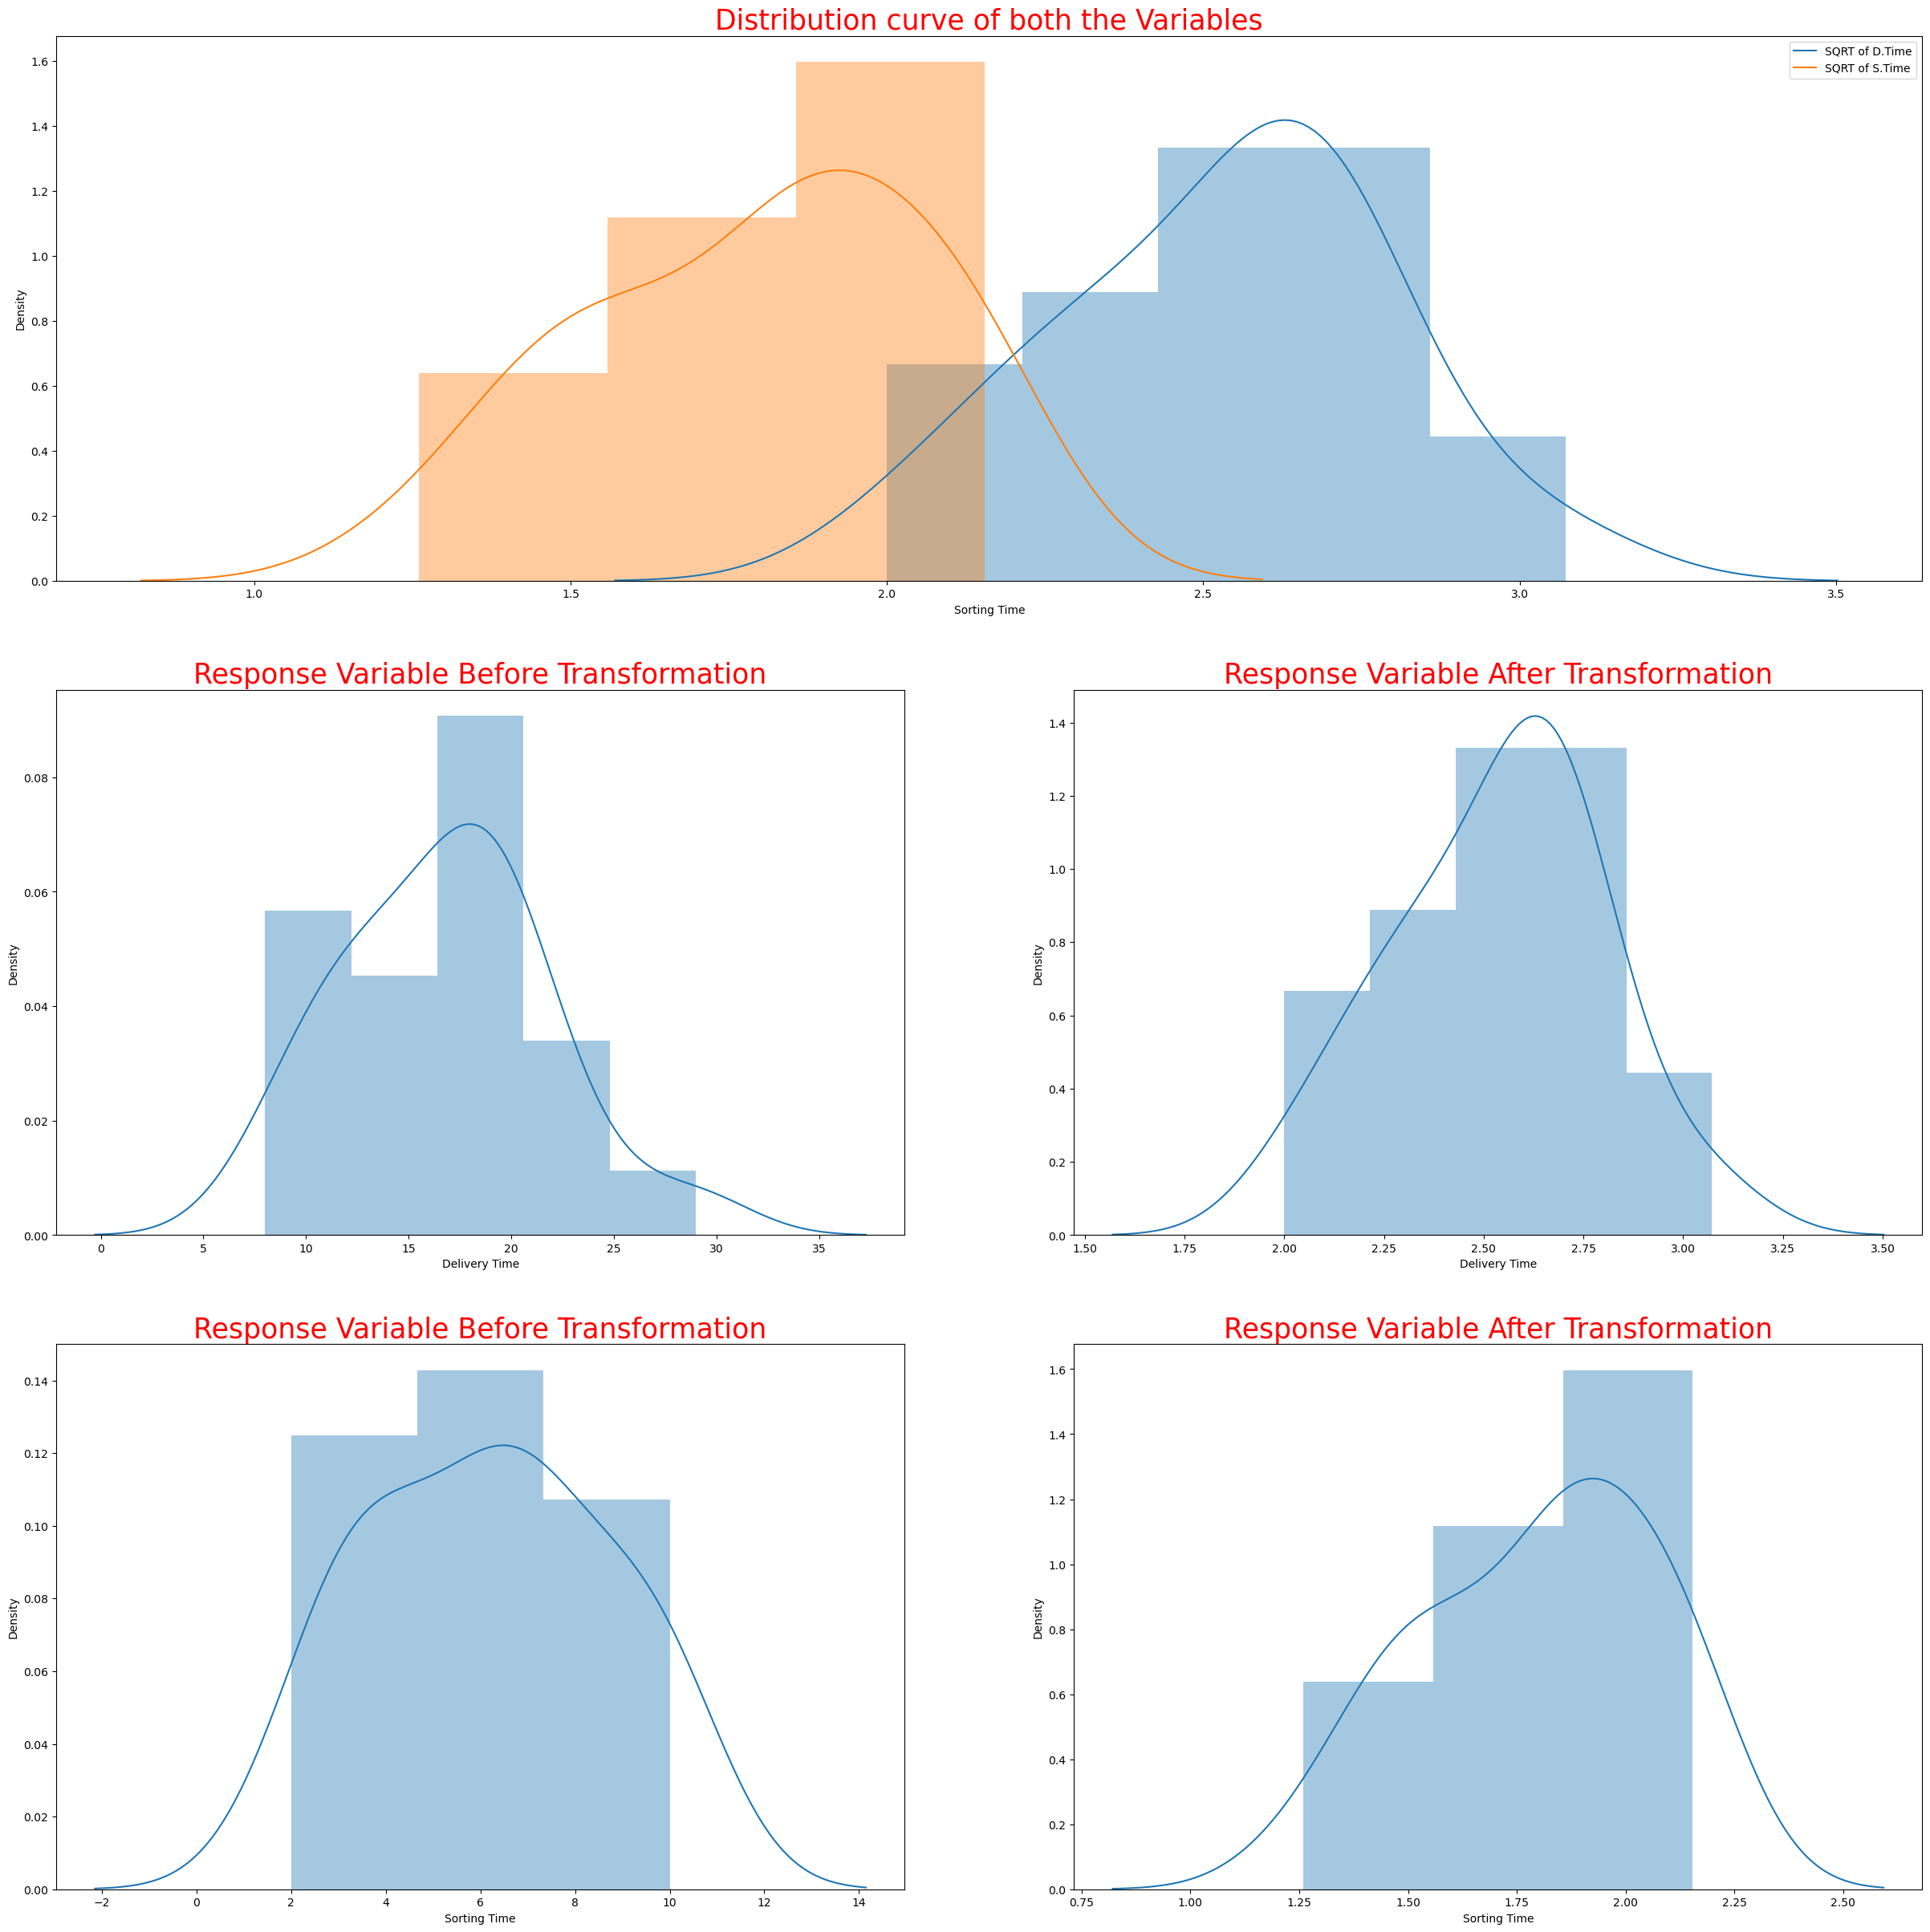

In [18]:
plt.figure(figsize=[100,100])
plt.subplots(3,2, figsize=(30,30))
plt.subplot(311)
labels=['SQRT of D.Time','SQRT of S.Time']
sns.distplot(np.cbrt(data['Delivery Time']), kde=True)
sns.distplot(np.cbrt(data['Sorting Time']), kde=True)
plt.legend(labels)
plt.title('Distribution curve of both the Variables', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(323)
sns.distplot(data['Delivery Time'], kde= True)
plt.title('Response Variable Before Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(324)
sns.distplot(np.cbrt(data['Delivery Time']), kde= True)
plt.title('Response Variable After Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(325)
sns.distplot(data['Sorting Time'], kde= True)
plt.title('Response Variable Before Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.subplot(326)
sns.distplot(np.cbrt(data['Sorting Time']), kde= True)
plt.title('Response Variable After Transformation', fontdict={'fontsize':25, 'color':'r'})
plt.show()

####  <font color = 'green'> Building Model on CUBE Transformed Data

In [19]:
model3 = smf.ols("np.cbrt(data['Delivery Time'])~np.cbrt(data['Sorting Time'])", data = data).fit()

In [20]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.cbrt(data['Delivery Time'])   R-squared:                       0.744
Model:                                        OLS   Adj. R-squared:                  0.731
Method:                             Least Squares   F-statistic:                     55.25
Date:                            Sat, 11 Feb 2023   Prob (F-statistic):           4.90e-07
Time:                                    20:03:21   Log-Likelihood:                 13.035
No. Observations:                              21   AIC:                            -22.07
Df Residuals:                                  19   BIC:                            -19.98
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(data['Sorting Time'])     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the model1
+ After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model
+ Yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction. 
+ Though it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can stop here.

### Model Testing
#### As Y = Beta0 + Beta1*(X)
#### Finding Coefficient Parameters (Beta0 and Beta1 values)

In [21]:
model.params

Intercept               6.582734
data['Sorting Time']    1.649020
dtype: float64

#### Here, (Intercept) Beta0 value = 6.58 & (Sorting Time) Beta1 value = 1.64
#### Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
#### Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [22]:
print(model.tvalues,'\n', model.pvalues)

Intercept               3.823349
data['Sorting Time']    6.387447
dtype: float64 
 Intercept               0.001147
data['Sorting Time']    0.000004
dtype: float64


#### (Intercept) Beta0: tvalue=3.82 , pvalue=0.001147
#### (Sorting Time)     Beta1: tvalue=6.38, pvalue=0.000004
#### As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable. 
#### R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
#### Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [23]:
model.rsquared,model.rsquared_adj


(0.6822714748417231, 0.6655489208860244)

### Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

# <font color = 'red'> Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

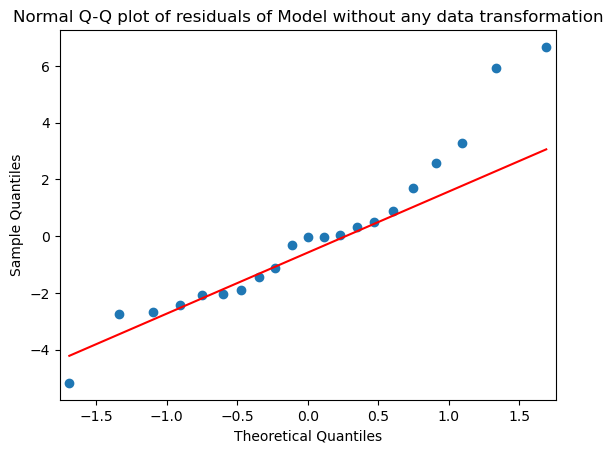

In [24]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

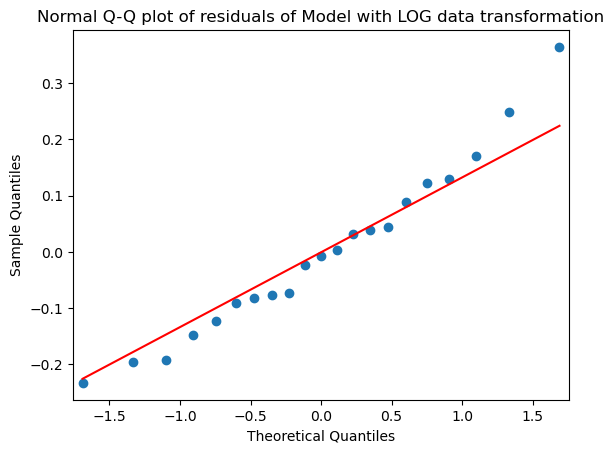

In [25]:
sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with LOG data transformation')
plt.show()

## <font color='red'> As you can notice in the above plots
+ Both The Model have slightly different plots
+ The first model is right skewed and doesn't follow normal distribution
+ The second model after log-transformation follows normal distributon with less skewness than first model

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [26]:
def get_standard_values(vals):
    return (vals-vals.mean())/(vals.std())

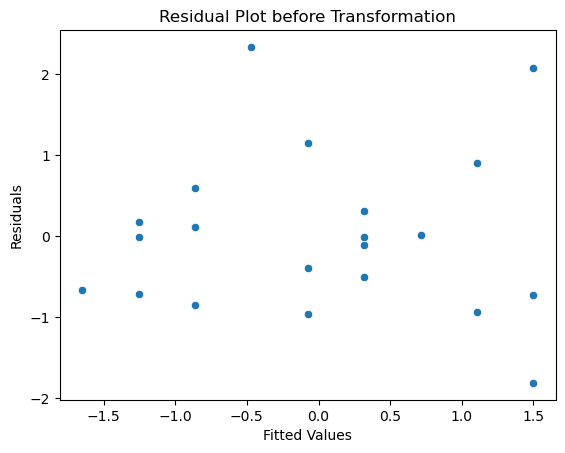

In [27]:
sns.scatterplot(x= get_standard_values(model.fittedvalues), y= get_standard_values(model.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot before Transformation')
plt.show()

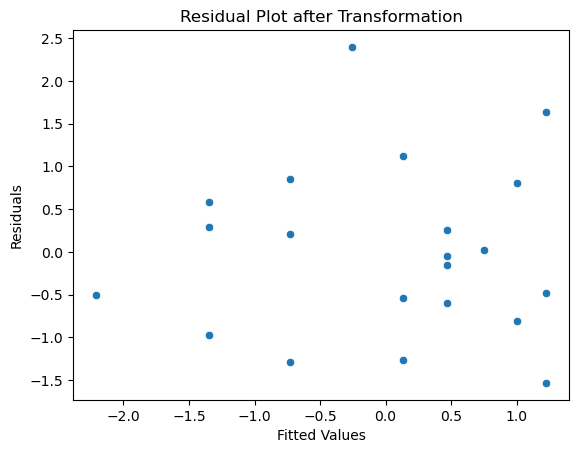

In [28]:
sns.scatterplot(x= get_standard_values(model1.fittedvalues), y= get_standard_values(model1.resid))
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot after Transformation')
plt.show()

## <font color='red'> As you can notice in the above plots
+ Both The Model have Homoscedasciticity. 
+ The Residual(i.e Residual  = Actual Value - Predicted Value) and the Fitted values do not share any Pattern. 
+ Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

### <font color = 'red'> Model Validation
 

### Comparing different models with respect to their Root Mean Squared Errors
### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE)

In [29]:
model1_pred_values = np.exp(model1.predict(data['Sorting Time']))
model2_pred_values = np.square(model2.predict(data['Sorting Time']))
model3_pred_values = pow(model3.predict(data['Sorting Time']),3)

In [30]:
model1_rms = np.sqrt(mean_squared_error(data['Delivery Time'],model1_pred_values))
model2_rms = np.sqrt(mean_squared_error(data['Delivery Time'],model2_pred_values))
model3_rms = np.sqrt(mean_squared_error(data['Delivery Time'],model3_pred_values))

In [31]:
print('RMSE value of \n Pre-Transformed model=', np.sqrt(model.mse_resid),'\n Log model =',model1_rms,'\n Square root model=',model2_rms, '\n Cube root model=',model3_rms)

RMSE value of 
 Pre-Transformed model= 2.9349037688901394 
 Log model = 2.7458288976145497 
 Square root model= 2.762294279320867 
 Cube root model= 2.755584309893575


In [32]:
best_model = {'Pre-Transformed(model)': np.sqrt(model.mse_resid),'Log model(model1)' : model1_rms, 'square root model(model2)':model2_rms , 'cube root model(model3)': model3_rms }
print('The best model is :' ,min(best_model, key=best_model.get))

The best model is : Log model(model1)


## <font color='red'>As Log model has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model1 to predict our values 
+ model1 is the model where we did log transformation on both dependent variable as well as on independent variable

### <font color = 'red'>  Predicting values from Model with Log Transformation on the Data

In [33]:
Predicted = pd.DataFrame()
Predicted['Sorting Time'] = data['Sorting Time']
Predicted['Delivery Time'] = data['Delivery Time']
Predicted['Predicted Delivery Time'] = model1_pred_values
Predicted

,Sorting Time,Delivery Time,Predicted Delivery Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


### Predicitng from Original Model without any data transformation

In [34]:
Predicted1 = pd.DataFrame()
Predicted1['Sorting Time'] = data['Sorting Time']
Predicted1['Delivery Time'] = data['Delivery Time']
Predicted1['Predicted Delivery Time'] = model.predict(data['Sorting Time'])
Predicted1

,Sorting Time,Delivery Time,Predicted Delivery Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
